In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://mirror.its.dal.ca/apache/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
# !ls
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark
!pip install spark_sklearn

     |████████████████████████████████| 4.9MB 6.9MB/s 
  Created wheel for spark-sklearn: filename=spark_sklearn-0.3.0-cp36-none-any.whl size=30592 sha256=9378b640d49112d36819075b1d3e06250a44dba0a4ba8f744933c707a9c95480
  Stored in directory: /root/.cache/pip/wheels/64/28/e8/cb0250888675c630786f932dcc63ed96ac1aca299bcfb7235f
Successfully built spark-sklearn
ERROR: yellowbrick 0.9.1 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.2 which is incompatible.
ERROR: imbalanced-learn 0.4.3 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.2 which is incompatible.
  Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1


In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()

In [0]:
#import library

import time
from scipy import stats
import pyspark
from pyspark import SparkContext, SparkConf
sc = pyspark.SparkContext()
import os
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

Using TensorFlow backend.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [0]:
training = pd.read_csv("/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/Dataset/training/trainingSet_noEmpty.csv")
testing = pd.read_csv("/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/Dataset/testing/testingSet_noEmpty.csv")

print(training.shape)
print(training.columns)
print()
print(testing.shape)
print(testing.columns)

(2690, 123)
Index(['Spanish Div', 'Year', 'Month', 'Day', 'FTHG', 'FTAG', 'HTHG', 'HTAG',
       'HS', 'AS',
       ...
       'AwayTeam_Sociedad', 'AwayTeam_Sp Gijon', 'AwayTeam_Valencia',
       'AwayTeam_Valladolid', 'AwayTeam_Vallecano', 'AwayTeam_Villarreal',
       'HTR_A', 'HTR_D', 'HTR_H', 'FTR'],
      dtype='object', length=123)

(1140, 123)
Index(['Spanish Div', 'Year', 'Month', 'Day', 'FTHG', 'FTAG', 'HTHG', 'HTAG',
       'HS', 'AS',
       ...
       'AwayTeam_Sociedad', 'AwayTeam_Sp Gijon', 'AwayTeam_Valencia',
       'AwayTeam_Valladolid', 'AwayTeam_Vallecano', 'AwayTeam_Villarreal',
       'HTR_A', 'HTR_D', 'HTR_H', 'FTR'],
      dtype='object', length=123)


In [0]:
# convert back those attribute to int

training[['Spanish Div','Year','Month','Day','FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY',
         'HR','AR']] = training[['Spanish Div','Year','Month','Day','FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY',
         'HR','AR']].astype(int)

testing[['Spanish Div','Year','Month','Day','FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY',
         'HR','AR']] = testing[['Spanish Div','Year','Month','Day','FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY',
         'HR','AR']].astype(int)

In [0]:
training.iloc[:,65:122] = training.iloc[:,65:122].astype(int)
testing.iloc[:,65:122] = testing.iloc[:,65:122].astype(int)

In [0]:
training.rename(columns={"BbMx<2.5": "BbMx_less_than_2.5", "BbAv<2.5": "BbAv_less_than_2.5", "BbMx>2.5": "BbMx_more_than_2.5", "BbAv>2.5": "BbAv_more_than_2.5"},inplace = True)
testing.rename(columns={"BbMx<2.5": "BbMx_less_than_2.5", "BbAv<2.5": "BbAv_less_than_2.5", "BbMx>2.5": "BbMx_more_than_2.5", "BbAv>2.5": "BbAv_more_than_2.5"},inplace = True)

In [0]:
training['FTR'] = training['FTR'].map({'A':0,'D':1,'H':2})
testing['FTR'] = testing['FTR'].map({'A':0,'D':1,'H':2})

In [0]:
print(training.shape)
print(testing.shape)

(2690, 123)
(1140, 123)


In [0]:
testing = testing[training.columns.values]

In [0]:
training.iloc[:,49:53].columns.values

array(['BbMx_more_than_2.5', 'BbAv_more_than_2.5', 'BbMx_less_than_2.5',
       'BbAv_less_than_2.5'], dtype=object)

In [0]:
testing.iloc[:,49:53].columns.values

array(['BbMx_more_than_2.5', 'BbAv_more_than_2.5', 'BbMx_less_than_2.5',
       'BbAv_less_than_2.5'], dtype=object)

In [0]:
# lasso- feature selection
# https://towardsdatascience.com/feature-selection-using-regularisation-a3678b71e499
# https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/

In [0]:
from sklearn.feature_selection import SelectFromModel
#from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
X_train = training.iloc[:,0:122]
y_train = training.iloc[:,-1]

X_test = testing.iloc[:,0:122]
y_test = testing.iloc[:,-1]

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
from sklearn.feature_selection import SelectFromModel
#from sklearn.linear_model import LogisticRegression
sel_ = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [0]:
feature_idx = sel_.get_support()
feature_idx

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True,  True, False, False,  True, False,  True,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True])

In [0]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
#print('features importance: {}'.format(
#     (sel_.estimator_.feature_importances_)))

total features: 122
selected features: 47


In [0]:
print(selected_feat)

Index(['Day', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF',
       'AF', 'HC', 'AC', 'B365H', 'BWA', 'IWA', 'LBH', 'WHH', 'WHA', 'SJH',
       'SJD', 'SJA', 'VCA', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA',
       'BbAvA', 'BbOU', 'BbMx_more_than_2.5', 'BbAv_more_than_2.5',
       'BbMx_less_than_2.5', 'BbAv_less_than_2.5', 'BbMxAHH', 'BbAvAHH',
       'BbMxAHA', 'BbAvAHA', 'PSH', 'PSD', 'PSA', 'PSCH', 'PSCD', 'PSCA',
       'HTR_A', 'HTR_D', 'HTR_H'],
      dtype='object')


In [0]:
feature_name = X_train.columns[feature_idx]
print(feature_name)

Index(['Day', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HF',
       'AF', 'HC', 'AC', 'B365H', 'BWA', 'IWA', 'LBH', 'WHH', 'WHA', 'SJH',
       'SJD', 'SJA', 'VCA', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA',
       'BbAvA', 'BbOU', 'BbMx_more_than_2.5', 'BbAv_more_than_2.5',
       'BbMx_less_than_2.5', 'BbAv_less_than_2.5', 'BbMxAHH', 'BbAvAHH',
       'BbMxAHA', 'BbAvAHA', 'PSH', 'PSD', 'PSA', 'PSCH', 'PSCD', 'PSCA',
       'HTR_A', 'HTR_D', 'HTR_H'],
      dtype='object')


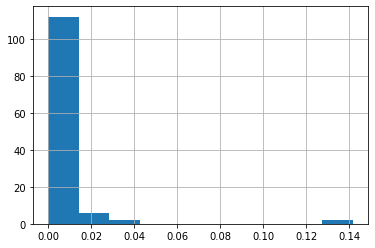

In [0]:
# Show the distibution of feature importance score of selected feature
import pandas as pd
pd.Series(sel_.estimator_.feature_importances_.ravel()).hist()

In [0]:
#print Feature Importance Score 
feat_score = pd.DataFrame({'Feature Name': X_train.columns, 'Feature Importance Score': list(sel_.estimator_.feature_importances_)}, columns=['Feature Name', 'Feature Importance Score'])
feat_score.sort_values("Feature Importance Score", axis = 0, ascending = False, 
                 inplace = True, na_position ='last') 
feat_score.head(len(selected_feat))

Feature Name  Feature Importance Score
4                  FTHG                  0.141611
5                  FTAG                  0.131581
121               HTR_H                  0.036727
119               HTR_A                  0.031216
6                  HTHG                  0.026776
11                  AST                  0.021330
10                  HST                  0.018542
64                 PSCA                  0.016096
62                 PSCH                  0.016052
7                  HTAG                  0.015937
120               HTR_D                  0.013332
47                BbAvA                  0.012815
25                  BWA                  0.012758
34                  WHA                  0.012557
46                BbMxA                  0.012417
61                  PSA                  0.011872
20                B365H                  0.011582
63                 PSCD                  0.011558
43                BbAvH                  0.011481
35                  SJH                  0.011195
14                   HC                  0.011177
60                  PSD                  0.011160
3                   Day                  0.010857
9                    AS                  0.010704
55              BbMxAHH                  0.010635
40                  VCA                  0.010618
37                  SJA                  0.010521
59                  PSH                  0.010239
12                   HF                  0.010111
57              BbMxAHA                  0.010045
8                    HS                  0.010043
42                BbMxH                  0.010026
50   BbAv_more_than_2.5                  0.009894
58              BbAvAHA                  0.009888
29                  LBH                  0.009817
56              BbAvAHH                  0.009654
51   BbMx_less_than_2.5                  0.009519
49   BbMx_more_than_2.5                  0.009407
36                  SJD                  0.009307
52   BbAv_less_than_2.5                  0.009171
44                BbMxD                  0.009005
45                BbAvD                  0.009004
13                   AF                  0.008746
15                   AC                  0.008743
48                 BbOU                  0.008708
32                  WHH                  0.008558
28                  IWA                  0.008329

In [0]:
newXtrain = X_train[feature_name]

newXtrain.shape

(2690, 47)

In [0]:
newXtest = X_test[feature_name]

newXtest.shape

(1140, 47)

In [0]:
import time
from sklearn.ensemble import RandomForestClassifier
import spark_sklearn
from spark_sklearn import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc
#import xgboost as xgb

In [0]:
def metrics_calculation(model_name,Y_true,Y_predict):
  #roc=roc_auc_score(Y_true, Y_predict)
  accuracy = accuracy_score(Y_true, Y_predict)
  precision = precision_score(Y_true, Y_predict,average=None)
  recall = recall_score(Y_true, Y_predict,average=None)
  f1 = f1_score(Y_true, Y_predict,average=None)
  metrics=  pd.DataFrame([[model_name,accuracy,precision,recall,f1]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
  return metrics

In [0]:
model_results = []
models = {}
confusion_matrices = []
time_results=[]

In [0]:
# Random Forest Classifier
parameters = {
    "max_depth": [3, None],
    "max_features": [1, 3, 5],
    "min_samples_split": [0.5, 0.9],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"],
    "n_estimators": [10, 20, 40, 80]
}

In [0]:
start = time.time()
gs = spark_sklearn.GridSearchCV(sc,estimator=RandomForestClassifier(), cv=5,param_grid=parameters,n_jobs=-1)
gs.fit(newXtrain, y_train)
finish = time.time()
print('Time required to do Parallel Grid Search CV: {} seconds'.format(finish - start))
time_results.append(("RandomForestClassifier",finish - start))
time_results

Time required to do Parallel Grid Search CV: 237.74145007133484 seconds


[('RandomForestClassifier', 237.74145007133484)]

In [0]:
models['rfc'] = gs
predYtest = gs.predict(newXtest)
model_results.append(metrics_calculation('Random Forest Classifier',y_test,predYtest))
model_results

[                      Model  ...                                       F1 Score
 0  Random Forest Classifier  ...  [0.7255172413793104, 0.0, 0.7776917118512781]
 
 [1 rows x 5 columns]]

In [0]:
# confusion matrix

#confusion_matrices.append(confusion_matrix(Y_test,predYtest))
#confusion_matrices
print('Random Forest: ', confusion_matrix(y_test,predYtest))
confusion_matrices.append(("RandomForestClassifier",confusion_matrix(y_test,predYtest)))
confusion_matrices

Random Forest:  [[263   0  72]
 [ 88   0 176]
 [ 39   0 502]]


[('RandomForestClassifier', array([[263,   0,  72],
         [ 88,   0, 176],
         [ 39,   0, 502]]))]

In [0]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
parameters = {
    'max_depth':[2,4,6,8,10],
    'min_samples_leaf':[2,4,6,8,10], 
    'min_samples_split':[2,4,6,8,10],
    'criterion': ['gini','entropy']
}

In [0]:
start = time.time()
dt = DecisionTreeClassifier()
gs_dt = spark_sklearn.GridSearchCV(sc,estimator=dt,cv=5,param_grid=parameters,n_jobs=-1)
gs_dt.fit(newXtrain,y_train)
finish = time.time()
print('Time required to do Parallel Grid Search CV: {} seconds'.format(finish - start))
time_results.append(("DecisionTreeClassifier",finish - start))
time_results

Time required to do Parallel Grid Search CV: 48.07794976234436 seconds


[('RandomForestClassifier', 237.74145007133484),
 ('DecisionTreeClassifier', 48.07794976234436)]

In [0]:
models['dt'] = gs_dt
predYtest = gs_dt.predict(newXtest)
model_results.append(metrics_calculation('Decision Tree',y_test,predYtest))
model_results

[                      Model  ...                                       F1 Score
 0  Random Forest Classifier  ...  [0.7255172413793104, 0.0, 0.7776917118512781]
 
 [1 rows x 5 columns],
            Model  ...                                      F1 Score
 0  Decision Tree  ...  [1.0, 0.998109640831758, 0.9990749306197965]
 
 [1 rows x 5 columns]]

In [0]:
# confusion matrix
print('Decision Tree: ', confusion_matrix(y_test,predYtest))
confusion_matrices.append(("DecisionTreeClassifier",confusion_matrix(y_test,predYtest)))
confusion_matrices

Decision Tree:  [[335   0   0]
 [  0 264   0]
 [  0   1 540]]


[('RandomForestClassifier', array([[263,   0,  72],
         [ 88,   0, 176],
         [ 39,   0, 502]])), ('DecisionTreeClassifier', array([[335,   0,   0],
         [  0, 264,   0],
         [  0,   1, 540]]))]

In [0]:
# KNN Classifier
parameters = {
    'n_neighbors': [3,5,10],
}

In [0]:
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
knn = KNeighborsClassifier()
gs_knn = spark_sklearn.GridSearchCV(sc,estimator=knn,cv=5,param_grid=parameters,n_jobs=-1)
gs_knn.fit(newXtrain,y_train)
finish = time.time()
print('Time required to do Parallel Grid Search CV: {} seconds'.format(finish - start))
time_results.append(("KNeighborsClassifier",finish - start))
time_results

Time required to do Parallel Grid Search CV: 4.285330295562744 seconds


[('RandomForestClassifier', 237.74145007133484),
 ('DecisionTreeClassifier', 48.07794976234436),
 ('KNeighborsClassifier', 4.285330295562744)]

In [0]:
models['knn'] = gs_knn
predYtest = gs_knn.predict(newXtest)
model_results.append(metrics_calculation('KNN Classifier',y_test,predYtest))
model_results

[                      Model  ...                                       F1 Score
 0  Random Forest Classifier  ...  [0.7255172413793104, 0.0, 0.7776917118512781]
 
 [1 rows x 5 columns],
            Model  ...                                      F1 Score
 0  Decision Tree  ...  [1.0, 0.998109640831758, 0.9990749306197965]
 
 [1 rows x 5 columns],
             Model  ...                                           F1 Score
 0  KNN Classifier  ...  [0.6151468315301392, 0.29398663697104677, 0.73...
 
 [1 rows x 5 columns]]

In [0]:
# confusion matrix
print('KNN Classifier: ', confusion_matrix(y_test,predYtest))
confusion_matrices.append(("Classifier",confusion_matrix(y_test,predYtest)))
confusion_matrices

KNN Classifier:  [[199  56  80]
 [ 72  66 126]
 [ 41  63 437]]


[('RandomForestClassifier', array([[263,   0,  72],
         [ 88,   0, 176],
         [ 39,   0, 502]])), ('DecisionTreeClassifier', array([[335,   0,   0],
         [  0, 264,   0],
         [  0,   1, 540]])), ('Classifier', array([[199,  56,  80],
         [ 72,  66, 126],
         [ 41,  63, 437]]))]

In [0]:
# Logistic Regression
parameters = {
  'C': [0.001, 0.01, 0.1, 1, 10], 
  'class_weight': [None, 'balanced'], 
  'penalty': ['l1', 'l2']
}

In [0]:
from sklearn.linear_model import LogisticRegression
start = time.time()
lr = LogisticRegression()
gs_lr = spark_sklearn.GridSearchCV(sc,estimator=lr,param_grid = parameters,cv=5,n_jobs=-1)
gs_lr.fit(newXtrain,y_train)
finish = time.time()
print('Time required to do Parallel Grid Search CV: {} seconds'.format(finish - start))
time_results.append(("LogisticRegression",finish - start))
time_results

Time required to do Parallel Grid Search CV: 25.510305166244507 seconds


[('RandomForestClassifier', 237.74145007133484),
 ('DecisionTreeClassifier', 48.07794976234436),
 ('KNeighborsClassifier', 4.285330295562744),
 ('LogisticRegression', 25.510305166244507)]

In [0]:
models['lr'] = gs_lr
predYtest = gs_lr.predict(newXtest)
model_results.append(metrics_calculation('Logistic Regression',y_test,predYtest))
model_results

[                      Model  ...                                       F1 Score
 0  Random Forest Classifier  ...  [0.7255172413793104, 0.0, 0.7776917118512781]
 
 [1 rows x 5 columns],
            Model  ...                                      F1 Score
 0  Decision Tree  ...  [1.0, 0.998109640831758, 0.9990749306197965]
 
 [1 rows x 5 columns],
             Model  ...                                           F1 Score
 0  KNN Classifier  ...  [0.6151468315301392, 0.29398663697104677, 0.73...
 
 [1 rows x 5 columns],
                  Model  Accuracy  ...           Recall         F1 Score
 0  Logistic Regression       1.0  ...  [1.0, 1.0, 1.0]  [1.0, 1.0, 1.0]
 
 [1 rows x 5 columns]]

In [0]:
# Confusion Matrix
print('Logistic Regression: ', confusion_matrix(y_test,predYtest))
confusion_matrices.append(("LogisticRegression",confusion_matrix(y_test,predYtest)))
confusion_matrices

Logistic Regression:  [[335   0   0]
 [  0 264   0]
 [  0   0 541]]


[('RandomForestClassifier', array([[263,   0,  72],
         [ 88,   0, 176],
         [ 39,   0, 502]])), ('DecisionTreeClassifier', array([[335,   0,   0],
         [  0, 264,   0],
         [  0,   1, 540]])), ('Classifier', array([[199,  56,  80],
         [ 72,  66, 126],
         [ 41,  63, 437]])), ('LogisticRegression', array([[335,   0,   0],
         [  0, 264,   0],
         [  0,   0, 541]]))]

In [0]:
# SGD
parameters = {
  'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0], 
  'class_weight': [None, 'balanced']
}

In [0]:
from sklearn.linear_model import SGDClassifier
start = time.time()
sgd = SGDClassifier(loss="hinge")
gs_sgd = spark_sklearn.GridSearchCV(sc,estimator=sgd,param_grid = parameters,cv=5,n_jobs=-1)
gs_sgd.fit(newXtrain,y_train)
finish = time.time()
print('Time required to do Parallel Grid Search CV: {} seconds'.format(finish - start))
time_results.append(("SGD Classifier",finish - start))
time_results

Time required to do Parallel Grid Search CV: 2.9192819595336914 seconds


[('RandomForestClassifier', 237.74145007133484),
 ('DecisionTreeClassifier', 48.07794976234436),
 ('KNeighborsClassifier', 4.285330295562744),
 ('LogisticRegression', 25.510305166244507),
 ('SGD Classifier', 2.9192819595336914)]

In [0]:
models['sgd'] = gs_sgd
predYtest = gs_sgd.predict(newXtest)
model_results.append(metrics_calculation('SGD',y_test,predYtest))
model_results

[                      Model  ...                                       F1 Score
 0  Random Forest Classifier  ...  [0.7255172413793104, 0.0, 0.7776917118512781]
 
 [1 rows x 5 columns],
            Model  ...                                      F1 Score
 0  Decision Tree  ...  [1.0, 0.998109640831758, 0.9990749306197965]
 
 [1 rows x 5 columns],
             Model  ...                                           F1 Score
 0  KNN Classifier  ...  [0.6151468315301392, 0.29398663697104677, 0.73...
 
 [1 rows x 5 columns],
                  Model  Accuracy  ...           Recall         F1 Score
 0  Logistic Regression       1.0  ...  [1.0, 1.0, 1.0]  [1.0, 1.0, 1.0]
 
 [1 rows x 5 columns],
   Model  ...                                           F1 Score
 0   SGD  ...  [0.7286527514231499, 0.2864077669902913, 0.805...
 
 [1 rows x 5 columns]]

In [0]:
# Confusion Matrix
print('SGD: ', confusion_matrix(y_test,predYtest))
confusion_matrices.append(("SGDClassifier",confusion_matrix(y_test,predYtest)))
confusion_matrices

SGD:  [[192  88  55]
 [  0  59 205]
 [  0   1 540]]


[('RandomForestClassifier', array([[263,   0,  72],
         [ 88,   0, 176],
         [ 39,   0, 502]])), ('DecisionTreeClassifier', array([[335,   0,   0],
         [  0, 264,   0],
         [  0,   1, 540]])), ('Classifier', array([[199,  56,  80],
         [ 72,  66, 126],
         [ 41,  63, 437]])), ('LogisticRegression', array([[335,   0,   0],
         [  0, 264,   0],
         [  0,   0, 541]])), ('SGDClassifier', array([[192,  88,  55],
         [  0,  59, 205],
         [  0,   1, 540]]))]

In [0]:
# SVM
parameters = [
   {'kernel': ['rbf'], 'gamma': [100 ,10,1, 1e-1, 1e-2, 1e-3, 1e-4],
    'kernel': ['poly'], 'degree': [0, 1, 2, 3, 4, 5, 6],
   'C': [1, 10, 100, 500]},
]

In [0]:
from sklearn import svm
start = time.time()
svc = svm.SVC(probability=True)
gs_svc = spark_sklearn.GridSearchCV(sc,estimator=svc,param_grid = parameters,cv=5,n_jobs=-1)
gs_svc.fit(newXtrain,y_train)
finish = time.time()
print('Time required to do Parallel Grid Search CV: {} seconds'.format(finish - start))
time_results.append(("SVM",finish - start))
time_results

Time required to do Parallel Grid Search CV: 1181.573126077652 seconds


[('RandomForestClassifier', 237.74145007133484),
 ('DecisionTreeClassifier', 48.07794976234436),
 ('KNeighborsClassifier', 4.285330295562744),
 ('LogisticRegression', 25.510305166244507),
 ('SGD Classifier', 2.9192819595336914),
 ('SVM', 1181.573126077652)]

In [0]:
models['svm'] = gs_svc
redYtest = gs_svc.predict(newXtest)
model_results.append(metrics_calculation('SVM',y_test,predYtest))
model_results

[                      Model  ...                                       F1 Score
 0  Random Forest Classifier  ...  [0.7255172413793104, 0.0, 0.7776917118512781]
 
 [1 rows x 5 columns],
            Model  ...                                      F1 Score
 0  Decision Tree  ...  [1.0, 0.998109640831758, 0.9990749306197965]
 
 [1 rows x 5 columns],
             Model  ...                                           F1 Score
 0  KNN Classifier  ...  [0.6151468315301392, 0.29398663697104677, 0.73...
 
 [1 rows x 5 columns],
                  Model  Accuracy  ...           Recall         F1 Score
 0  Logistic Regression       1.0  ...  [1.0, 1.0, 1.0]  [1.0, 1.0, 1.0]
 
 [1 rows x 5 columns],
   Model  ...                                           F1 Score
 0   SGD  ...  [0.7286527514231499, 0.2864077669902913, 0.805...
 
 [1 rows x 5 columns],
   Model  ...                                           F1 Score
 0   SVM  ...  [0.7286527514231499, 0.2864077669902913, 0.805...
 
 [1 rows x 5 colu

In [0]:
# Confusion Matrix
print('SVM: ', confusion_matrix(y_test,predYtest))
confusion_matrices.append(("SVMClassifier",confusion_matrix(y_test,predYtest)))
confusion_matrices

SVM:  [[192  88  55]
 [  0  59 205]
 [  0   1 540]]


[('RandomForestClassifier', array([[263,   0,  72],
         [ 88,   0, 176],
         [ 39,   0, 502]])), ('DecisionTreeClassifier', array([[335,   0,   0],
         [  0, 264,   0],
         [  0,   1, 540]])), ('Classifier', array([[199,  56,  80],
         [ 72,  66, 126],
         [ 41,  63, 437]])), ('LogisticRegression', array([[335,   0,   0],
         [  0, 264,   0],
         [  0,   0, 541]])), ('SGDClassifier', array([[192,  88,  55],
         [  0,  59, 205],
         [  0,   1, 540]])), ('SVMClassifier', array([[192,  88,  55],
         [  0,  59, 205],
         [  0,   1, 540]]))]

In [0]:
#XGBoost
#https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e
#https://www.datacamp.com/community/tutorials/xgboost-in-python

parameters = [
    {'objective': ['reg:logistic'],
     'learning_rate': [0.01, 0.05, 0.1],
     'n_estimators': [10, 20, 40, 80],
     'max_depth': [3,5,10],
     'gamma': [1,3,5,10],
     'colsample_bytree': [0.3, 0.5, 0.8]},
]

In [0]:
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
#from sklearn.cross_validation import *
from sklearn.model_selection import GridSearchCV

start = time.time()
xgb_model = xgb.XGBClassifier()
#gs_xgbc = spark_sklearn.GridSearchCV(sc,estimator=xgbc,param_grid = parameters,cv=5,n_jobs=-1)
xgbc = GridSearchCV(estimator=xgb_model,param_grid = parameters,cv=5,n_jobs=-1)
xgbc.fit(newXtrain,y_train)
finish = time.time()
print('Time required to do Parallel Grid Search CV: {} seconds'.format(finish - start))
time_results.append(("XGBoost Classifier",finish - start))
time_results

Time required to do Parallel Grid Search CV: 833.1529760360718 seconds


[('RandomForestClassifier', 237.74145007133484),
 ('DecisionTreeClassifier', 48.07794976234436),
 ('KNeighborsClassifier', 4.285330295562744),
 ('LogisticRegression', 25.510305166244507),
 ('SGD Classifier', 2.9192819595336914),
 ('SVM', 1181.573126077652),
 ('XGBoost Classifier', 833.1529760360718)]

In [0]:
models['xgbc'] = xgbc
predYtest = xgbc.predict(newXtest)
model_results.append(metrics_calculation('XGBC',y_test,predYtest))
model_results

[                      Model  ...                                       F1 Score
 0  Random Forest Classifier  ...  [0.7255172413793104, 0.0, 0.7776917118512781]
 
 [1 rows x 5 columns],
            Model  ...                                      F1 Score
 0  Decision Tree  ...  [1.0, 0.998109640831758, 0.9990749306197965]
 
 [1 rows x 5 columns],
             Model  ...                                           F1 Score
 0  KNN Classifier  ...  [0.6151468315301392, 0.29398663697104677, 0.73...
 
 [1 rows x 5 columns],
                  Model  Accuracy  ...           Recall         F1 Score
 0  Logistic Regression       1.0  ...  [1.0, 1.0, 1.0]  [1.0, 1.0, 1.0]
 
 [1 rows x 5 columns],
   Model  ...                                           F1 Score
 0   SGD  ...  [0.7286527514231499, 0.2864077669902913, 0.805...
 
 [1 rows x 5 columns],
   Model  ...                                           F1 Score
 0   SVM  ...  [0.7286527514231499, 0.2864077669902913, 0.805...
 
 [1 rows x 5 colu

In [0]:
# Confusion Matrix
print('XGBC: ', confusion_matrix(y_test,predYtest))
confusion_matrices.append(("XGBoost Classifier",confusion_matrix(y_test,predYtest)))
confusion_matrices

XGBC:  [[335   0   0]
 [  0 263   1]
 [  0   0 541]]


[('RandomForestClassifier', array([[263,   0,  72],
         [ 88,   0, 176],
         [ 39,   0, 502]])), ('DecisionTreeClassifier', array([[335,   0,   0],
         [  0, 264,   0],
         [  0,   1, 540]])), ('Classifier', array([[199,  56,  80],
         [ 72,  66, 126],
         [ 41,  63, 437]])), ('LogisticRegression', array([[335,   0,   0],
         [  0, 264,   0],
         [  0,   0, 541]])), ('SGDClassifier', array([[192,  88,  55],
         [  0,  59, 205],
         [  0,   1, 540]])), ('SVMClassifier', array([[192,  88,  55],
         [  0,  59, 205],
         [  0,   1, 540]])), ('XGBoost Classifier', array([[335,   0,   0],
         [  0, 263,   1],
         [  0,   0, 541]]))]

In [0]:
# combine dataframes, each dataframe store the metrics of each classifier

df1 = pd.DataFrame(model_results[0])
df2 = pd.DataFrame(model_results[1])
df3 = pd.DataFrame(model_results[2])
df4 = pd.DataFrame(model_results[3])
df5 = pd.DataFrame(model_results[4])
df6 = pd.DataFrame(model_results[5])
df7 = pd.DataFrame(model_results[6])
frames = [df1, df2, df3, df4, df5, df6, df7]
result = pd.concat(frames)
result

Model  ...                                           F1 Score
0  Random Forest Classifier  ...      [0.7255172413793104, 0.0, 0.7776917118512781]
0             Decision Tree  ...       [1.0, 0.998109640831758, 0.9990749306197965]
0            KNN Classifier  ...  [0.6151468315301392, 0.29398663697104677, 0.73...
0       Logistic Regression  ...                                    [1.0, 1.0, 1.0]
0                       SGD  ...  [0.7286527514231499, 0.2864077669902913, 0.805...
0                       SVM  ...  [0.7286527514231499, 0.2864077669902913, 0.805...
0                      XGBC  ...      [1.0, 0.9981024667931689, 0.9990766389658357]

[7 rows x 5 columns]

No handles with labels found to put in legend.


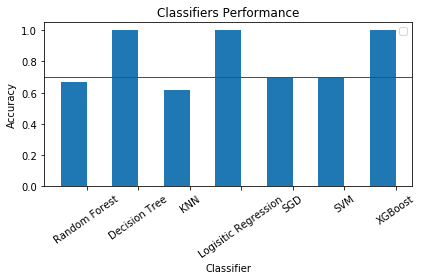

In [0]:
# plot accuracy bar chart

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Random Forest', 'Decision Tree', 'KNN', 'Logisitic Regression', 'SGD', 'SVM', 'XGBoost']
#accuracy = [0.619298, 0.997368	, 0.571053	, 1.000000	, 0.474561,0.474561, 0.999123	]
accuracy = result['Accuracy']

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Classifier')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation = 35)
ax.set_title('Classifiers Performance')
ax.legend()

plt.axhline(y=0.7,linewidth=1, color='r')

fig.tight_layout()

plt.show()